In [63]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud
import pandas as pd
import seaborn as sns 
import numpy as np
import matplotlib.pyplot as plt
from math import ceil
import csv
import ast

In [65]:
data = pd.read_csv('/Users/mac/Downloads/before_2.csv',delimiter=",",header = None)
data.head()

,0,1
0,"[0.006931628151790679,0.005946793510152523,0.0...","[cat,water,bag,food,filter,one,get,use,eat,open]"
1,"[0.011660870409572236,0.0074851153267948885,0....","[litter,cat,box,food,use,vet,year,dog,day,well]"
2,"[0.009096197961856815,0.006838715119213326,0.0...","[dog,toy,tooth,love,food,treat,chew,smell,eat,..."
3,"[0.004927156593274857,0.004880793311432379,0.0...","[toy,love,chew,hay,bone,treat,ball,like,pig,cat]"
4,"[0.00907528225029609,0.008945079275570571,0.00...","[seat,leash,diaper,car,harness,cover,u,velcro,..."


In [69]:
data.iloc[0][0]

'[0.006931628151790679,0.005946793510152523,0.005090178446993778,0.004654223075063661,0.004631376759708595,0.004072705279834484,0.003933743531616499,0.0036228800616644567,0.00353210948739968,0.0033155152688298197]'

In [70]:
data.iloc[0][1]

'[cat,water,bag,food,filter,one,get,use,eat,open]'

In [72]:
world_list = []
for i in range(5):
    word_dict = {}
    frequency = ast.literal_eval(data.iloc[i][0])
    name = data.iloc[i][1].strip('][').split(',')
    for i in range(len(name)):
        word_dict[name[i]] = frequency[i]
    world_list.append(word_dict)

In [73]:
world_list

[{'cat': 0.006931628151790679,
  'water': 0.005946793510152523,
  'bag': 0.005090178446993778,
  'food': 0.004654223075063661,
  'filter': 0.004631376759708595,
  'one': 0.004072705279834484,
  'get': 0.003933743531616499,
  'use': 0.0036228800616644567,
  'eat': 0.00353210948739968,
  'open': 0.0033155152688298197},
 {'litter': 0.011660870409572236,
  'cat': 0.0074851153267948885,
  'box': 0.007075426486044558,
  'food': 0.006921379607500653,
  'use': 0.004265278959172703,
  'vet': 0.004177123179481207,
  'year': 0.003780853216475683,
  'dog': 0.0037065798761644142,
  'day': 0.0036743654249063004,
  'well': 0.0036423149882745336},
 {'dog': 0.009096197961856815,
  'toy': 0.006838715119213326,
  'tooth': 0.006577993104418404,
  'love': 0.006400446135722093,
  'food': 0.006012834487433111,
  'treat': 0.0052429627335974695,
  'chew': 0.005068864299613257,
  'smell': 0.004854891724329027,
  'eat': 0.004495610292219116,
  'like': 0.0040154370055086016},
 {'toy': 0.004927156593274857,
  'lov

In [74]:
def plot_wordclouds(topics, colormap="cividis"):
    cloud = WordCloud(
        background_color='white',
        width=600,
        height=400,
        colormap=colormap,
        prefer_horizontal=1.0,
    )

    num_topics = len(topics)
    fig_width = min(ceil(0.6 * num_topics + 6), 20)
    fig_height = min(ceil(0.65 * num_topics), 20)
    fig = plt.figure(figsize=(fig_width, fig_height))

    for idx, word_weights in tqdm(enumerate(topics), total=num_topics):
        ax = fig.add_subplot((num_topics / 5) + 1, 5, idx + 1)
        wordcloud = cloud.generate_from_frequencies(word_weights)
        ax.imshow(wordcloud, interpolation="bilinear")
        ax.set_title('Topic {}'.format(idx + 1))
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        ax.tick_params(length=0)

    plt.tick_params(labelsize=14)
    plt.subplots_adjust(wspace=0.1, hspace=0.1)
    plt.margins(x=0.1, y=0.1)
    st = fig.suptitle("LDA Topics", y=0.92)
#     fig.savefig("pyspark-topics.png", bbox_extra_artists=[st], bbox_inches='tight')
    plt.show()

In [75]:
from tqdm import tqdm

  0%|          | 0/5 [00:00<?, ?it/s]<ipython-input-74-41c35b94eb72>:16: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  ax = fig.add_subplot((num_topics / 5) + 1, 5, idx + 1)
100%|██████████| 5/5 [00:00<00:00, 11.53it/s]


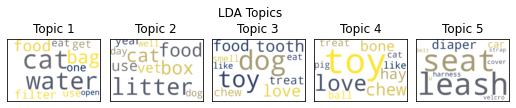

UsageError: Line magic function `%matplot` not found.


In [76]:
plt.close()
plot_wordclouds(world_list)
%matplot plt

In [77]:
data = pd.read_csv('/Users/mac/Downloads/after_2.csv',delimiter=",",header = None)
data.head()

,0,1
0,"[0.0069457412946933896,0.006816312454237421,0....","[hair,use,flea,work,brush,product,spray,get,ca..."
1,"[0.012686116859810342,0.006044027755829386,0.0...","[toy,play,one,chew,dog,puppy,small,ball,cat,get]"
2,"[0.0072638603294970655,0.006443672646497315,0....","[water,collar,work,use,ear,fountain,dog,bark,g..."
3,"[0.007853003363560027,0.005852939576285522,0.0...","[bag,order,open,package,amazon,product,buy,foo..."
4,"[0.013172386759952207,0.009645872474671396,0.0...","[food,dog,eat,treat,love,cat,give,like,flavor,..."


In [78]:
world_list = []
for i in range(5):
    word_dict = {}
    frequency = ast.literal_eval(data.iloc[i][0])
    name = data.iloc[i][1].strip('][').split(',')
    for i in range(len(name)):
        word_dict[name[i]] = frequency[i]
    world_list.append(word_dict)

In [10]:
data = data.drop('Unnamed: 0', 1)

  0%|          | 0/5 [00:00<?, ?it/s]<ipython-input-74-41c35b94eb72>:16: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  ax = fig.add_subplot((num_topics / 5) + 1, 5, idx + 1)
100%|██████████| 5/5 [00:00<00:00,  9.86it/s]


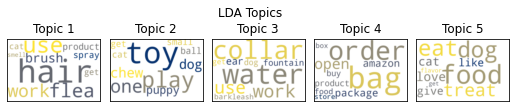

UsageError: Line magic function `%matplot` not found.


In [79]:
plt.close()
plot_wordclouds(world_list)
%matplot plt